数据预处理&可视化

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #导入matplotlib.pyplot画图模块
import seaborn as sns
import matplotlib.font_manager as mfm  # 字体
font_path = r"/Users/mac/Library/Fonts/字体管家方萌简（非商业使用）v1.1.ttf"
prop = mfm.FontProperties(fname = font_path)

# 1.读入数据

In [77]:
os.chdir("/Users/mac/Desktop/快乐研一/数据挖掘/留学推荐code&data/留学数据code&data/")
descriptive = pd.read_csv('./data/Data_Cleaning.csv') # 读取原始数据
print(descriptive.shape)
descriptive.head()

(16215, 32)


,index_origin,author,time,toefl,gre_total,gre_v,gre_q,gre_aw,district,season,...,major_before,cross,gpa_measure,rl,intern,research,paper,first,sci,exchange
0,10001,leucocyte,17,92,319,149,170,3,美国,Fall,...,CS,1,4.0,0,0,0,0,0,0,0
1,10003,yycenty,17,96,327,NaN,NaN,3.5,美国,Fall,...,环工,0,4.0,0,0,0,0,0,0,0
2,10004,JOJOJie,17,101,322,NaN,NaN,3.5,美国,Fall,...,EE,0,100.0,0,0,0,1,1,1,0
3,10008,smallyeye,17,103,325,NaN,NaN,3.5,美国,Fall,...,能源与动力工程,0,100.0,0,0,0,0,0,0,0
4,10013,wannagotousa,17,108,328,NaN,NaN,3.5,美国,Fall,...,电信工程,0,100.0,0,1,0,0,0,0,0


# 2.因变量

In [78]:
# 2.因变量调整
# 调整命名
descriptive['offertype'] = descriptive['offertype'].replace('Rej','Rejected')
descriptive['offertype'] = descriptive['offertype'].replace(['AD小奖','Offer','AD无奖'],'Admitted')  # 不考虑奖学金，均归入“Admitted“（录取）
descriptive = descriptive.dropna(subset=['offertype'])  # 删去缺失录取结果的样本
print(descriptive['offertype'].unique())
# 为简化后续分信息，删掉录取结果为WaitingList的样本
descriptive = descriptive[descriptive['offertype'] != 'WaitingList']
descriptive['offertype'].value_counts()

['Rejected' 'Admitted' 'WaitingList']


Admitted    11370
Rejected     4538
Name: offertype, dtype: int64

# 3.申请学位

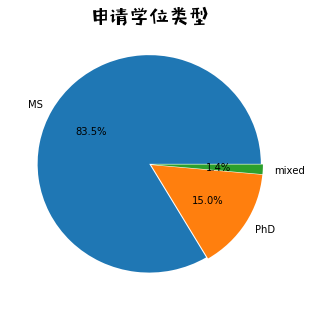

offertype  Admitted  Rejected
type                         
MS         0.713759  0.286241
PhD        0.718045  0.281955
混合         0.736842  0.263158


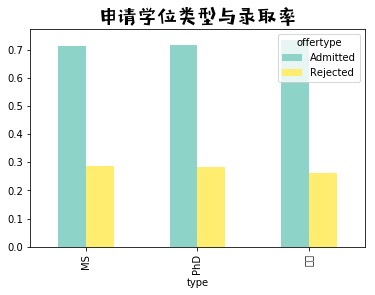

In [14]:
# 饼图
descriptive['type'].unique()  
plt.figure(figsize=(5,5))
plt.pie(list(descriptive['type'].value_counts()), 
        explode = [0.01,0.01,0.01], 
        labels = ['MS', 'PhD', 'mixed'],
        autopct='%1.1f%%')
plt.title('申请学位类型',fontproperties=prop, fontsize=20)
plt.show()
plt.close()
# 不同学位录取率
admit_counts=pd.crosstab(descriptive['type'],descriptive['offertype'])
admit_pcts=admit_counts.div(admit_counts.sum(1),axis=0)
print(admit_pcts)
admit_pcts.plot.bar(cmap = "Set3")
plt.title('申请学位类型与录取率',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

# 4.申请学校

In [17]:
descriptive['college_apply']=descriptive['college_apply'].replace(['Texas A','M University'],'Texas A&M University')
descriptive['college_apply']=descriptive['college_apply'].replace(['Washington University in St','Louis'],'Washington University in St. Louis')

## 4.1 统一学校名称

In [19]:
suoxie=pd.read_table('./data/所有大学&地区/美国大学缩写汇总.txt',sep=' ')
college_low=descriptive['college_apply'].str.lower()
suoxie_low=suoxie['ysuoxie'].str.lower()
college_apply_new=[]
for i in college_low:
    count2 = 0
    for j in suoxie_low :
        if str(j) in str(i):
            count2 += 1
            college_apply_new.append(suoxie[suoxie['ysuoxie'].str.lower()==str(j)]['yquancheng'].values[0])
            break
    if not count2:
        college_apply_new.append(i)
print(len(college_apply_new))
descriptive['College_apply_new'] = college_apply_new    ##统一名称后的新变量

15344


## 4.2 热门申请学校

['University of Chicago', 'Carnegie Mellon University', 'Ithaca College', 'University of Southern California', 'Northeastern University', 'Liberty University', 'Duke University', 'University of Pennsylvania', 'Indiana University Bloomington', 'University of Northern Iowa (was Iowa Teachers)']


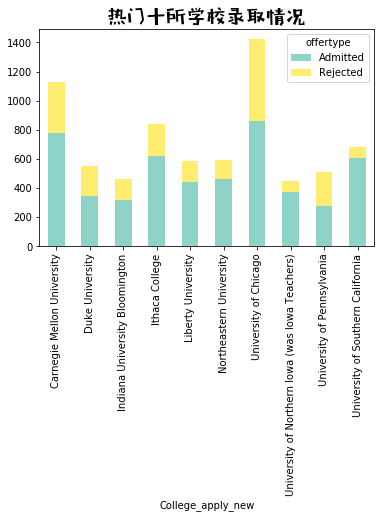

In [20]:
# 找出十大热门学校
top10_college_apply=descriptive['College_apply_new'].value_counts()[:10].index.tolist()
descriptive_top10=descriptive.loc[descriptive['College_apply_new'].isin(top10_college_apply)]
print(top10_college_apply)
# 图表展示
top10_counts = pd.crosstab(descriptive_top10['College_apply_new'],descriptive_top10['offertype'])
top10_counts.plot.bar(stacked = True,cmap = "Set3")
plt.title('热门十所学校录取情况',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 4.3 各学校录取率

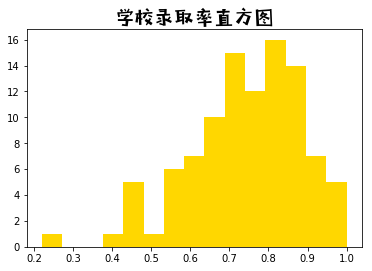

offertype                           Admitted  Rejected
College_apply_new                                     
New Jersey Institute of Technology       1.0       0.0
Rochester Institute of Technology        1.0       0.0
University of Alabama                    1.0       0.0
University of Utah                       1.0       0.0
ethz                                     1.0       0.0
offertype             Admitted  Rejected
College_apply_new                       
Princeton University      0.22      0.78


In [21]:
# 4.3 各学校录取率
# 排序并提取申请人数较多的百所学校 
top100_college_apply=descriptive['College_apply_new'].value_counts()[:100].index.tolist()
descriptive=descriptive.loc[descriptive['College_apply_new'].isin(top100_college_apply)]
counts_100=pd.crosstab(descriptive['College_apply_new'],descriptive['offertype'])
counts_pcts=counts_100.div(counts_100.sum(1),axis=0)
plt.hist(counts_pcts['Admitted'],color = "gold",bins=15)
plt.title('学校录取率直方图',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

# 录取率最低和最高的
print(counts_pcts[counts_pcts['Admitted']==max(counts_pcts['Admitted'])])
print(counts_pcts[counts_pcts['Admitted']==min(counts_pcts['Admitted'])])

## 4.4. 申请学校排名

In [24]:
## 按学校名称匹配大学排名
universities = pd.read_table('./data/QS大学排名前百（美国）.txt',header = None)  ## 读入QS世界大学排名
universities = [x[0] for x in universities.values]
top10university = descriptive['College_apply_new'].isin(universities[:6])
top10_50university = descriptive['College_apply_new'].isin(universities[6:])
ranktmp = top10university * 2+ top10_50university
collegeRank,collegeranktop50 = [],[]
for rk in ranktmp:
    if rk > 0:
        collegeranktop50.append('Top50')
        if rk == 2:
            collegeRank.append('Top10')
        elif rk == 1:
            collegeRank.append('Top10_50')
    else:
        collegeranktop50.append('Others')
        collegeRank.append('Others')
descriptive['CollegeRank']=collegeRank  ##并入原数据
descriptive['CollegeRankTop50']=collegeranktop50  ##并入原数据
print(descriptive['CollegeRank'].value_counts())

Others      9026
Top10_50    4586
Top10       1732
Name: CollegeRank, dtype: int64


# 5.原始学校

15344
  CollegeRank Before_CollegeRank offertype     ratio
0      Others             Others  Admitted  0.768595
1      Others             Top100  Admitted  0.754938
2       Top10             Others  Admitted  0.562833
3       Top10             Top100  Admitted  0.591885
4    Top10_50             Others  Admitted  0.663664
5    Top10_50             Top100  Admitted  0.669586


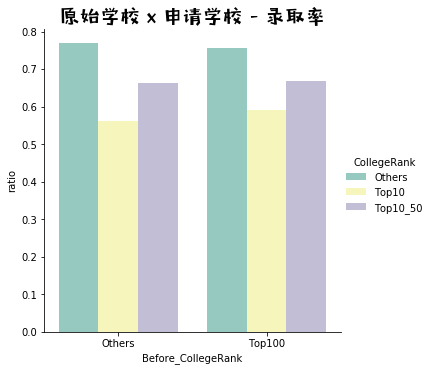

In [28]:
## 读入学校排名数据
universities2=pd.read_table('./data/QS大学排名前500（中国）.txt', header = None, sep='\t', error_bad_lines = False)
a100=universities2.values.tolist()[:10]
b100=[i for item in a100 for i in item]
## 匹配学校
top100university=[]
for i in descriptive['college_before']:
    count3 = 0
    for j in b100:
        if str(i) in str(j):
            count3 += 1
            top100university.append('Top100')
        break
    if not count3:
        top100university.append('Others')
print(len(top100university))
descriptive['Before_CollegeRank']=top100university
### 图表展示
top100_counts = pd.crosstab([descriptive['CollegeRank'],descriptive['Before_CollegeRank']],descriptive['offertype'])
top100_pcts=top100_counts.div(top100_counts.sum(1),axis=0)
top100_pcts1 = pd.DataFrame(top100_pcts)
rownames = top100_pcts1._stat_axis.values.tolist()
top100_pcts1['CollegeRank'] = [x[0] for x in rownames]
top100_pcts1['Before_CollegeRank'] = [x[1] for x in rownames]
top100_pcts1 = top100_pcts1.drop('Rejected', axis = 1)
# 宽-长
top100_pcts2 = top100_pcts1.melt(
        id_vars=["CollegeRank","Before_CollegeRank"],   #要保留的主字段
        value_name="ratio"                  # 拉长的度量值名称
        )
print(top100_pcts2)
sns.catplot(x='Before_CollegeRank', y='ratio', hue = 'CollegeRank',
               kind='bar', data=top100_pcts2, palette = "Set3")
plt.title('原始学校 x 申请学校 - 录取率',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

# 6.专业

In [30]:
def matchmajor(x):
    if x in ["统计","统计学","Statistics","STAT","Stat","stat","Biostat","应用数学","数学","math","Math/Stat","概率统计","应数","数学与应用数学"]:
        return "Stat/Biostat"
    if x in ["软件工程","se","Software Engineering"]:
        return "SE"
    if x in ["cs", "计算机科学","计算机","信息与计算科学","计算机科学与技术","Computer Science"]:
        return "CS"
    if x in ["材料","material","MSE","材料科学与工程","Material Physics"]:
        return "Material"
    if x in ["通信工程","信息工程","电子信息工程","ee","电子科学与技术","微电子","ECE","光电"]:
        return "EE"
    if x in ["Automation","自动化","工业工程","IE",'自动化控制',"电气工程及其自动化"]:
        return "IEOR"
    if x in ["金融数学","金融","金融工程","MFE","Fin","FinMath","fiannce","精算","数理金融"]:
        return "MFE/Fin/FinMath"
    if x in ["机械","机械工程",'热能与动力工程',"测控"]:
        return "ME"
    if x in ["物理","力学","physics","应用物理"]:
        return "Physics"
    if x in ["信息管理与信息系统"]:
        return "MIS"
    return x

## 6.1 十大热门原始专业

EE                 2935
CS                 1820
SE                 1002
Stat/Biostat        853
IEOR                727
ME                  456
Material            286
MIS                 236
Physics             231
MFE/Fin/FinMath     146
Name: major_before, dtype: int64


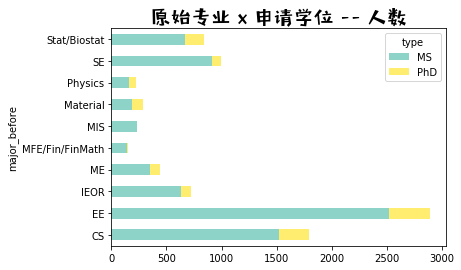

In [32]:
# 6.1 十大热门原始专业
major_before = list(descriptive['major_before'].values)
major_before = [matchmajor(x) for x in major_before]
descriptive['major_before'] = major_before
top10majorbefore = descriptive['major_before'].value_counts()[:10]
print(top10majorbefore)
top10mj_bf = top10majorbefore._stat_axis.values.tolist()
top10mj_bf_des = descriptive[(descriptive['major_before'].isin(top10mj_bf))]
# 原始专业 x 申请学位 -- 人数
mj_bf_top = pd.crosstab(top10mj_bf_des['major_before'],top10mj_bf_des['type'])
mj_bf_top = mj_bf_top.drop('混合', axis = 1)  # 删掉混合
mj_bf_top.plot.barh(stacked = True, cmap = "Set3")  # 画图
plt.title('原始专业 x 申请学位 -- 人数',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 6.2 热门申请专业

CS                 5160
EE                 3548
Stat/Biostat       1549
ME                  907
MIS                 692
CE                  477
Material            405
Other               391
IEOR                375
MFE/Fin/FinMath     338
CivilEng            323
Name: major_apply, dtype: int64


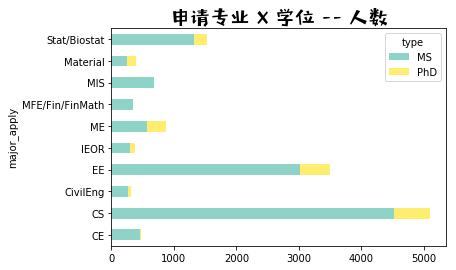

In [33]:
## 6.2 热门申请专业
top10mj_ap = descriptive['major_apply'].value_counts()[:11]
print(top10mj_ap)
top10mj_ap = top10mj_ap._stat_axis.values.tolist()
top10mj_ap.pop(-4)  # 删掉others
top10mj_ap_des = descriptive[(descriptive['major_apply'].isin(top10mj_ap))]
# 申请专业 X 学位 -- 人数
mj_ap_top =  pd.crosstab(top10mj_ap_des['major_apply'],top10mj_ap_des['type'])
mj_ap_top = mj_ap_top.drop('混合', axis = 1)  # 删掉混合
mj_ap_top.plot.barh(stacked = True, cmap = "Set3")  # 画图
plt.title('申请专业 X 学位 -- 人数',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 6.3 转专业矩阵

['CS', 'EE', 'Stat/Biostat', 'ME', 'IEOR', 'SE', 'MIS', 'Material', 'CE', 'MFE/Fin/FinMath']
[[0.92 0.01 0.01 0.   0.01 0.   0.04 0.   0.01 0.01]
 [0.26 0.62 0.01 0.   0.01 0.   0.02 0.   0.08 0.  ]
 [0.06 0.   0.82 0.   0.03 0.   0.01 0.   0.   0.09]
 [0.12 0.13 0.   0.67 0.03 0.   0.   0.   0.03 0.  ]
 [0.24 0.46 0.01 0.04 0.14 0.   0.02 0.   0.08 0.01]
 [0.94 0.01 0.   0.   0.   0.   0.04 0.   0.01 0.  ]
 [0.31 0.   0.03 0.   0.02 0.   0.62 0.   0.   0.01]
 [0.08 0.06 0.   0.08 0.02 0.   0.   0.75 0.   0.  ]
 [0.73 0.05 0.   0.   0.   0.   0.   0.   0.23 0.  ]
 [0.04 0.   0.49 0.   0.01 0.   0.11 0.   0.   0.35]]


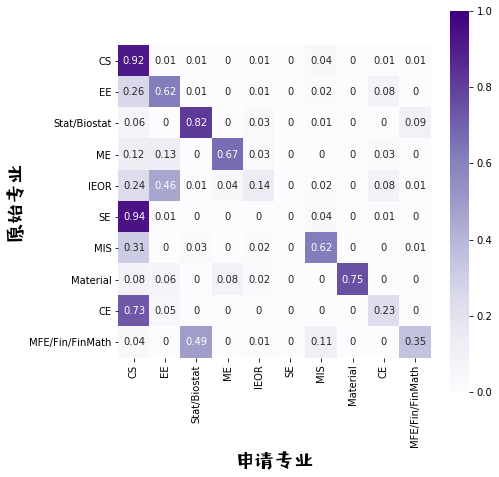

In [39]:
# 原始 + 申请的总的10大专业
major_before = list(descriptive['major_before'].values)
major_apply = list(descriptive['major_apply'].values)
majors = major_before + major_apply
TOP10major = pd.value_counts(majors)[:10]
TOP10major = TOP10major._stat_axis.values.tolist()
print(TOP10major)
# 取出申请或者原始为热门专业的数据
major_bf_ap = [(major_before[i] in TOP10major) and (major_apply[i] in TOP10major) for i in range(len(major_apply))]
major_des = descriptive[(major_bf_ap)]
# apply矩阵：
major_ap_matrix = pd.get_dummies(major_des.major_apply, prefix="apply")   # 全部生成虚拟变量，列名前面加上type
major_ap_matrix.insert(0, "apply_SE", 0, allow_duplicates=False)
major_ap_matrix2 = major_ap_matrix.reindex(["apply_"+x for x in TOP10major],axis = 1)
major_ap_matrix2.columns
# bf矩阵
major_bf_matrix = pd.get_dummies(major_des.major_before, prefix="before")   # 全部生成虚拟变量，列名前面加上type
major_bf_matrix2 = major_bf_matrix.reindex(["before_"+x for x in TOP10major],axis = 1)
major_bf_matrix2.columns
# 转移矩阵
major_ap_matrix = np.array(major_ap_matrix2)
major_bf_matrix = np.array(major_bf_matrix2)
TOP10major_matrix = np.dot(major_bf_matrix.T,major_ap_matrix)
TOP10major_matrixPct = TOP10major_matrix / np.sum(TOP10major_matrix, axis = 1, keepdims = True)
print(np.round(TOP10major_matrixPct,2))
# 矩阵图
plt.figure(figsize=(7,7))
sns.heatmap(pd.DataFrame(np.round(TOP10major_matrixPct,2), 
                         columns = TOP10major,
                         index = TOP10major), 
                annot=True, vmax=1,vmin = 0, 
                xticklabels= True, yticklabels= True, 
                square=True, cmap = 'Purples')
plt.xlabel('申请专业',fontproperties=prop, fontsize=20)
plt.ylabel('原始专业',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 6.4 热门专业申请结果

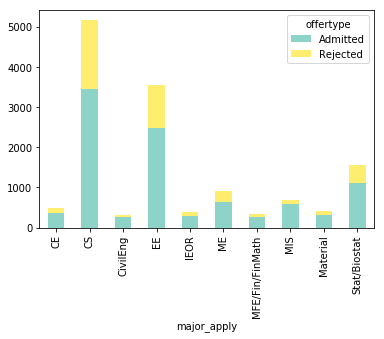

In [41]:
top10major_apply = descriptive.loc[descriptive['major_apply'].isin(top10mj_ap)]
top10major_offer = pd.crosstab(top10major_apply['major_apply'],top10major_apply['offertype'])
top10major_offer.plot.bar(stacked = True, cmap = "Set3")

##  6.5 转专业申请成功率

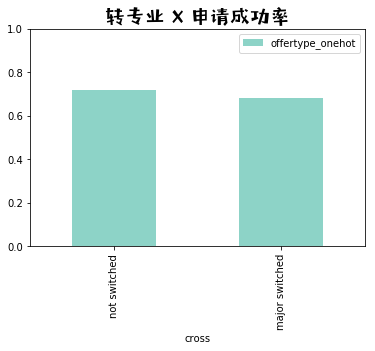

In [42]:
offertype2 = [1 if x == "Admitted" else 0 for x in descriptive['offertype'].values]
descriptive['offertype_onehot'] = offertype2
cross_offer_rate = descriptive.groupby(by = 'cross').agg({'offertype_onehot': "mean"})
cross_offer_rate.plot.bar(stacked = True, cmap = "Set3")
plt.xticks([0, 1],
  ['not switched', 'major switched'])
plt.ylim(0, 1)
plt.title('转专业 X 申请成功率',fontproperties=prop, fontsize=20)
plt.show()
plt.close()

# 7. GRE

## 7.1 GRE成绩预处理

In [44]:
### 7.1 GRE成绩预处理
## 转化为numeric型
gre_plot_dt=descriptive[['gre_total','gre_v','gre_q']]
descriptive['gre_v']=pd.to_numeric(gre_plot_dt['gre_v'],errors='coerce')
descriptive['gre_total']=pd.to_numeric(gre_plot_dt['gre_total'],errors='coerce')
descriptive['gre_q']=pd.to_numeric(gre_plot_dt['gre_q'],errors='coerce')
### 删去旧版gre verbal
descriptive=descriptive[descriptive['gre_total']<=340]

## 成绩分段
gre_total_dis=pd.cut(descriptive['gre_total'],
                    bins = [0, 315, 320, 325, 330, 350],   # 划分为5段
                     labels = ["<=315", "315-320", "320-325", "325-330", ">330"])
descriptive['gre_total_dis']=gre_total_dis

## 7.2 gre成绩与录取率

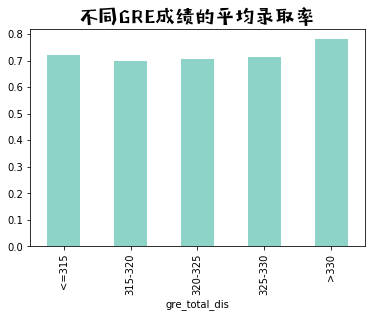

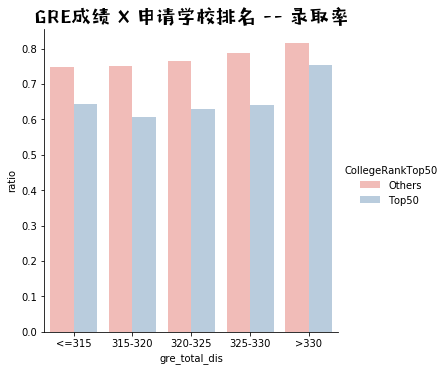

In [48]:
## 计算录取率
gre_counts=pd.crosstab(descriptive['gre_total_dis'],descriptive['offertype'])
gre_pcts=gre_counts.div(gre_counts.sum(1),axis=0)
gre_pcts['Admitted'].plot.bar( cmap = "Set3")
plt.title("不同GRE成绩的平均录取率",fontproperties=prop, fontsize=20)
plt.show()
plt.close()
## gre成绩 x 申请学校排名 x 录取率
gre_college_counts=pd.crosstab([descriptive['gre_total_dis'],descriptive['CollegeRankTop50']],descriptive['offertype'])
gre_college_pcts=gre_college_counts.div(gre_college_counts.sum(1),axis=0)
gre_college_pcts1=pd.DataFrame(gre_college_pcts)
rownames2=gre_college_pcts1._stat_axis.values.tolist()
gre_college_pcts1=gre_college_pcts1.drop('Rejected',axis=1)
gre_college_pcts1['gre_total_dis']= [x[0] for x in rownames2]
gre_college_pcts1['CollegeRankTop50'] = [x[1] for x in rownames2]
gre_college_pcts2 = gre_college_pcts1.melt(
        id_vars=["gre_total_dis","CollegeRankTop50"],   #要保留的主字段
        value_name="ratio"                  # 拉长的度量值名称
        )
sns.catplot(x='gre_total_dis', y='ratio',  palette = "Pastel1", hue = 'CollegeRankTop50', kind='bar', data=gre_college_pcts2)
plt.title("GRE成绩 X 申请学校排名 -- 录取率",fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 7.3 gre(verbal)、gre(quantitative)分数、学校排名与录取率

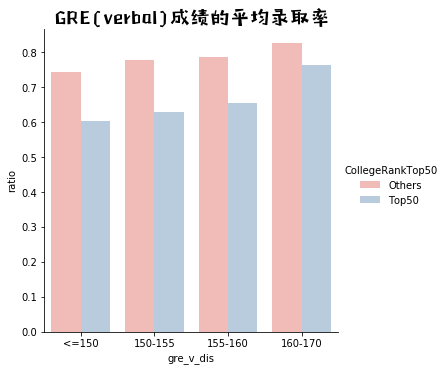

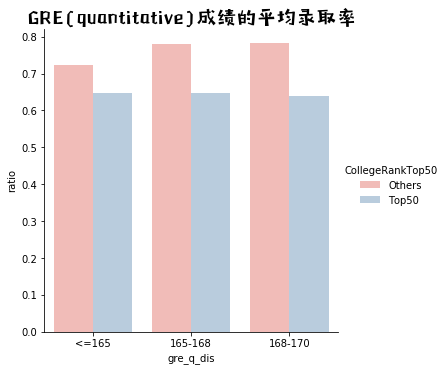

In [50]:
## gre verbal 录取率
gre_v_dis=pd.cut(descriptive['gre_v'],   # 成绩分段（下同）
                 bins = [0,150,155,160,170],
                 labels =["<=150","150-155","155-160","160-170"])
gre_v_counts=pd.crosstab([gre_v_dis,descriptive['CollegeRankTop50']],descriptive['offertype'])
gre_v_pcts=gre_v_counts.div(gre_v_counts.sum(1),axis=0)
gre_v_pcts1=pd.DataFrame(gre_v_pcts)
rownames3=gre_v_pcts1._stat_axis.values.tolist()
gre_v_pcts1=gre_v_pcts1.drop('Rejected',axis=1)
gre_v_pcts1['gre_v_dis']= [x[0] for x in rownames3]
gre_v_pcts1['CollegeRankTop50'] = [x[1] for x in rownames3]
gre_v_pcts2 = gre_v_pcts1.melt(
        id_vars=["gre_v_dis","CollegeRankTop50"],   #要保留的主字段
        value_name="ratio"                  # 拉长的度量值名称
        )
sns.catplot(x='gre_v_dis', y='ratio', hue = 'CollegeRankTop50', kind='bar',
                palette = "Pastel1", data=gre_v_pcts2)
plt.title("GRE(verbal)成绩的平均录取率",fontproperties=prop, fontsize=20)
plt.show()
plt.close()
## gre quantitative 录取率
gre_q_dis=pd.cut(descriptive['gre_q'],   # 成绩分段（下同）
                 bins = [0,165,168,170],
                 labels =["<=165","165-168","168-170"])
gre_q_counts=pd.crosstab([gre_q_dis,descriptive['CollegeRankTop50']],descriptive['offertype'])
gre_q_pcts=gre_q_counts.div(gre_q_counts.sum(1),axis=0)
gre_q_pcts1=pd.DataFrame(gre_q_pcts)
rownames4=gre_q_pcts1._stat_axis.values.tolist()
gre_q_pcts1=gre_q_pcts1.drop('Rejected',axis=1)
gre_q_pcts1['gre_q_dis']= [x[0] for x in rownames4]
gre_q_pcts1['CollegeRankTop50'] = [x[1] for x in rownames4]
gre_q_pcts2 = gre_q_pcts1.melt(
        id_vars=["gre_q_dis","CollegeRankTop50"],   #要保留的主字段
        value_name="ratio"                  # 拉长的度量值名称
        )
sns.catplot(x='gre_q_dis', y='ratio', hue = 'CollegeRankTop50', kind='bar', 
                palette = "Pastel1", data=gre_q_pcts2)
plt.title("GRE(quantitative)成绩的平均录取率",fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 7.4 热门专业的GRE录取分数

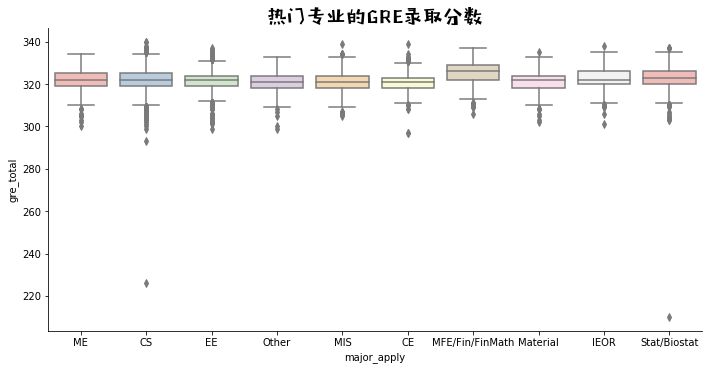

In [51]:
gre_admitted=descriptive[descriptive['offertype']=='Admitted']   ## 选出结果为录取的数据
top10mj_ap=['CS', 'EE', 'Stat/Biostat', 'ME', 'MIS', 'CE', 'Material', 'Other', 'IEOR', 'MFE/Fin/FinMath']
gre_top10mu_ap=gre_admitted[gre_admitted['major_apply'].isin(top10mj_ap)]
sns.catplot(x='major_apply',y='gre_total',kind='box', data=gre_top10mu_ap,
            height=5, aspect=2, palette="Pastel1")
plt.title("热门专业的GRE录取分数",fontproperties=prop, fontsize=20)
plt.show()
plt.close()

## 7.5 大学排名与GRE录取分数

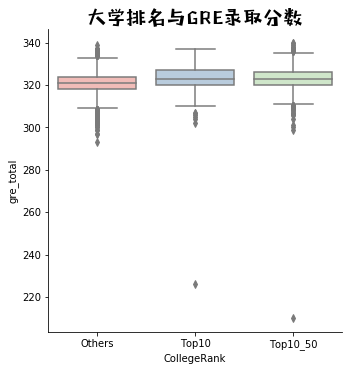

In [52]:
sns.catplot(x='CollegeRank',y='gre_total',kind='box',data=gre_top10mu_ap, palette="Pastel1")
plt.title("大学排名与GRE录取分数",fontproperties=prop, fontsize=20)
plt.show()
plt.close()

# 8.硬件条件

In [53]:
descriptive['first'] = abs(descriptive['first'])
descriptive['sci'] = abs(descriptive['sci'])

## 8.1 学位 X 硬件条件比例  

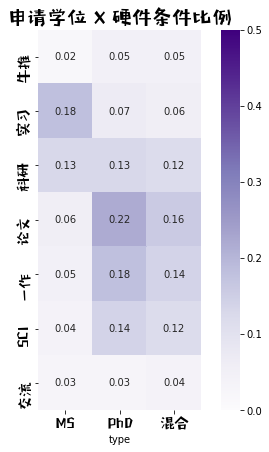

In [54]:
# 8.1 学位 X 硬件条件比例  
yingjian_type = descriptive.groupby(by = 'type').agg({'rl': "mean", 'intern': "mean",
                   'research': "mean",'paper': "mean",'first': "mean",
                   'sci': "mean",'exchange': "mean"})
fig = plt.figure(figsize=(7, 7))   # 画布
ax1 = fig.add_subplot(111)        # 创建子图
sns.heatmap(np.round(yingjian_type, 2).T, annot=True, vmax=0.5,vmin = 0, 
                square= True, cmap = "Purples")
ax1.set_yticklabels(labels = ["牛推","实习","科研","论文","一作","SCI","交流"], fontproperties=prop, fontsize=15)
ax1.set_xticklabels(labels = yingjian_type.index, fontproperties=prop, fontsize=15)
ax1.set_title('申请学位 X 硬件条件比例', fontproperties = prop, fontsize=20)
plt.show()
plt.close()

## 8.2 硬件条件  X 录取 （博士 or 硕士）

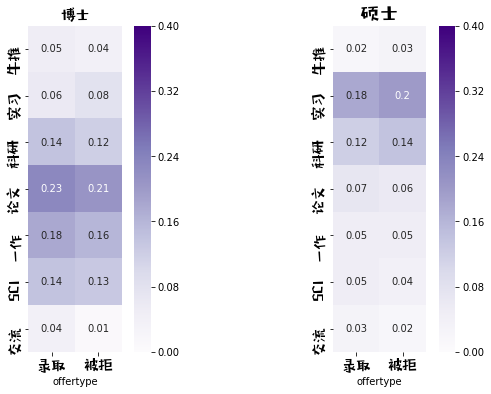

In [72]:
# 博士
des_phd = descriptive[descriptive['type']=='PhD']   # 选出phd
yingjian_offer_phd = des_phd.groupby(by = 'offertype').agg({'rl': "mean", 'intern': "mean",
                   'research': "mean",'paper': "mean",'first': "mean",
                   'sci': "mean",'exchange': "mean"})
fig = plt.figure(figsize=(10, 6))   # 画布
ax1 = fig.add_subplot(121)        # 创建子图
sns.heatmap(np.round(yingjian_offer_phd, 2).T, annot=True, vmax=0.4,vmin = 0, 
                square= True, cmap = "Purples")
ax1.set_yticklabels(labels = ["牛推","实习","科研","论文","一作","SCI","交流"], fontproperties=prop, fontsize=15)
ax1.set_xticklabels(labels = ["录取","被拒"], fontproperties=prop, fontsize=15)
ax1.set_title('博士', fontproperties = prop, fontsize=15)

# 硕士
des_ms = descriptive[descriptive['type']=='MS']   # 选出phd
yingjian_offer_ms = des_ms.groupby(by = 'offertype').agg({'rl': "mean", 'intern': "mean",
                   'research': "mean",'paper': "mean",'first': "mean",
                   'sci': "mean",'exchange': "mean"})
ax2 = fig.add_subplot(122)        # 创建子图
sns.heatmap(np.round(yingjian_offer_ms, 2).T, annot=True, vmax=0.4,vmin = 0, 
                square= True, cmap = "Purples")
ax2.set_yticklabels(labels = ["牛推","实习","科研","论文","一作","SCI","交流"], fontproperties=prop, fontsize=15)
ax2.set_xticklabels(labels = ["录取","被拒"], fontproperties=prop, fontsize=15)
ax2.set_title('硕士', fontproperties = prop, fontsize=20)
plt.show()
plt.close()

## 8.3 硬件条件 X 申请学校排名

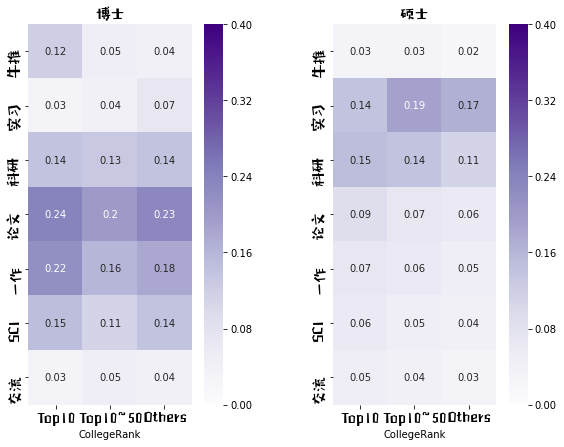

In [73]:
# 博士
des_admitted = descriptive[descriptive['offertype']=='Admitted']   # 选出被录取的
des_admitted_phd = des_admitted[des_admitted['type']=='PhD']   # 选出phd被录取的
yingjian_college_rank1 = des_admitted_phd.groupby(by = 'CollegeRank').agg({'rl': "mean", 'intern': "mean",
                   'research': "mean",'paper': "mean",'first': "mean",
                   'sci': "mean",'exchange': "mean"})
yingjian_college_rank1 = yingjian_college_rank1.reindex(["Top10","Top10_50","Others"],axis = 0)
fig = plt.figure(figsize=(10, 7))   # 画布
ax1 = fig.add_subplot(121)        # 创建子图
sns.heatmap(np.round(yingjian_college_rank1, 2).T, annot=True, vmax=0.4,vmin = 0, 
                square= True, cmap = "Purples")
ax1.set_yticklabels(labels = ["牛推","实习","科研","论文","一作","SCI","交流"], fontproperties=prop, fontsize=15)
ax1.set_xticklabels(labels = ["Top10","Top10~50","Others"], fontproperties=prop, fontsize=15)
ax1.set_title('博士', fontproperties = prop, fontsize=15)

# 硕士
des_admitted = descriptive[descriptive['offertype']=='Admitted']   # 选出被录取的
des_admitted_MS = des_admitted[des_admitted['type']=='MS']   # 选出ms录取的
yingjian_college_rank2 = des_admitted_MS.groupby(by = 'CollegeRank').agg({'rl': "mean", 'intern': "mean",
                   'research': "mean",'paper': "mean",'first': "mean",
                   'sci': "mean",'exchange': "mean"})
yingjian_college_rank2 = yingjian_college_rank2.reindex(["Top10","Top10_50","Others"],axis = 0)
ax2 = fig.add_subplot(122)        # 创建子图
sns.heatmap(np.round(yingjian_college_rank2, 2).T, annot=True, vmax=0.4,vmin = 0, 
                square= True, cmap = "Purples")
ax2.set_yticklabels(labels = ["牛推","实习","科研","论文","一作","SCI","交流"], fontproperties=prop, fontsize=15)
ax2.set_xticklabels(labels = ["Top10","Top10~50","Others"], fontproperties=prop, fontsize=15)
ax2.set_title('硕士', fontproperties = prop, fontsize=15)
plt.show()
plt.close()